In [18]:
#Jméno Mikheda Vladislav
#Login xmikhe00

In [19]:
import math
from cmath import exp, pi
import IPython as IPython
import numpy.fft
import spectrum as spectrum
from numpy.fft import fftfreq
from scipy.io import wavfile
import soundfile as sf
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram, buttord, butter, sosfilt, sos2tf, residuez
from scipy.signal import find_peaks
from IPython.display import display, Math, Latex

In [20]:
def DFT_function(data):
    N = len(data)
    exp_w = np.e ** ((-1j * 2 * np.pi) / N)
    X, Y = np.meshgrid(np.arange(N), np.arange(N))
    DFT_XY = X * Y
    DFT_MATRIX = np.power(exp_w, DFT_XY)

    return data.dot(DFT_MATRIX)

In [21]:
def nose_freq(signal, freq_arr, number):
    data = signal.copy()
    freq = []
    for i in range(number):
        a = data.max()
        a = np.where(a == data)
        data[a[0][0]] = 0
        freq.append(freq_arr[a[0][0]])
    return freq

In [22]:
file_name = "../audio/xmikhe00.wav"
samplerate, data = wavfile.read(file_name)
length_sec = data.shape[0] / samplerate
length_sam = len(data)

print(f"Minimum value = {data.min()}")
print(f"Maximum value = {data.max()}")
print(f"Length in samples = {length_sam}[samples]")
print(f"Length in seconds = {length_sec}[s]")

Minimum value = -2166
Maximum value = 3820
Length in samples = 34816[samples]
Length in seconds = 2.176[s]


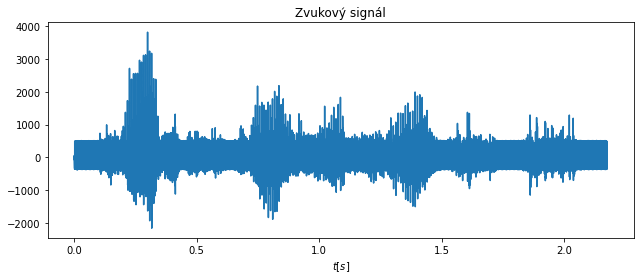

In [23]:
time = np.arange(data.size) / samplerate
plt.figure(figsize=(9, 4))
plt.plot(time, data)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál')
plt.tight_layout()
# plt.savefig('../img/z1.pdf')
plt.show()

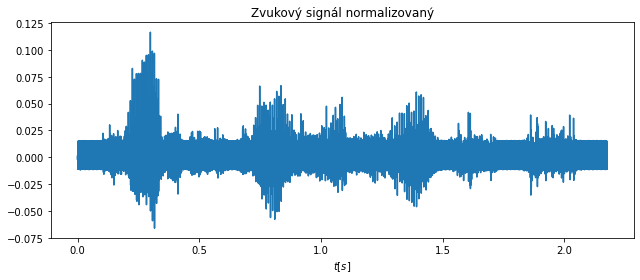

In [24]:
mean_value = np.mean(data, axis=0)
data_centering = data - mean_value
signal = data_centering
signal = signal / 2 ** 15

time = np.arange(data.size) / samplerate
plt.figure(figsize=(9, 4))
plt.plot(time, signal)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál normalizovaný')
plt.tight_layout()
# plt.savefig('../img/z2.pdf')
plt.show()

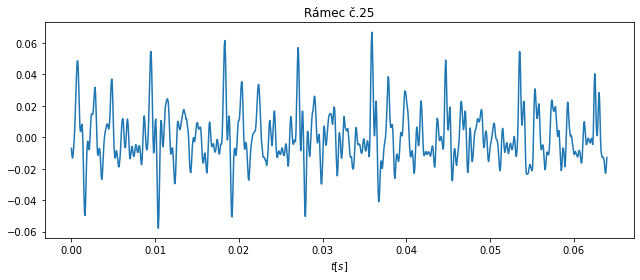

In [25]:
count = 0
arr_arr_signal = []
arr_signal = []

for i in range(1024, len(signal)+512, 512):
    for k in signal[count:i]:
        arr_signal.append(k)
    arr_arr_signal.append(arr_signal)
    arr_signal = []
    count += 512

matrix_signal = np.array(arr_arr_signal)
matrix_signal = matrix_signal.transpose()


time = np.arange(matrix_signal.transpose()[25].size) / samplerate #+ (25*512/16000)
plt.figure(figsize=(9, 4))
plt.plot(time, matrix_signal.transpose()[25])
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Rámec č.25')
plt.tight_layout()
# plt.savefig('../img/ramec_25.pdf')
plt.show()

allclose = True


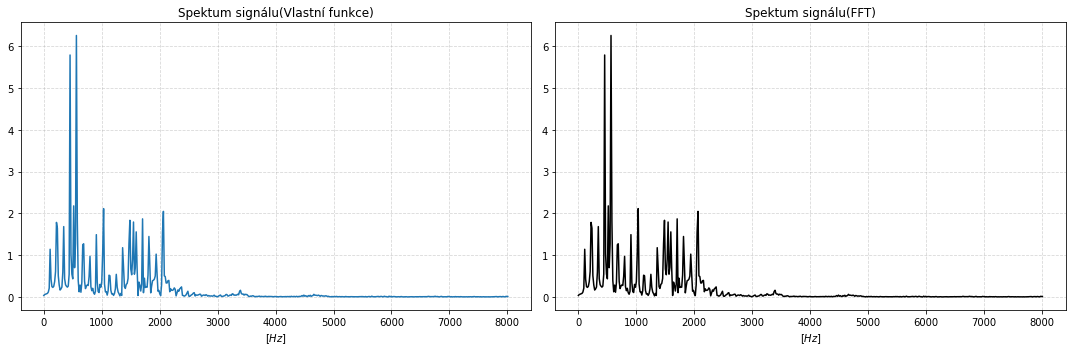

In [26]:
my_dft_coefficient = DFT_function(matrix_signal.transpose()[25])
dft_coefficient_fft = np.fft.fft(matrix_signal.transpose()[25])
print(f"allclose = {np.allclose(my_dft_coefficient, dft_coefficient_fft)}")

my_dft_coefficient_abs = np.abs(my_dft_coefficient)
dft_coefficient_fft_abs = np.abs(dft_coefficient_fft)

freq = np.linspace(0, samplerate, 1024)
_, ax = plt.subplots(1,2)
_.set_figheight(5)
_.set_figwidth(15)


# plt.figure(figsize=(10, 5))
ax[0].plot(freq[:freq.size // 2 + 1], my_dft_coefficient_abs[:my_dft_coefficient_abs.size // 2 + 1])
ax[0].set_xlabel('$[Hz]$')
ax[0].set_title('Spektum signálu(Vlastní funkce)')
ax[0].grid(alpha=0.5, linestyle='--')
# plt.show()


ax[1].plot(freq[:freq.size // 2 + 1], dft_coefficient_fft_abs[:dft_coefficient_fft_abs.size // 2 + 1],
         label="Not my", color="black")
ax[1].set_xlabel('$[Hz]$')
ax[1].set_title('Spektum signálu(FFT)')
ax[1].grid(alpha=0.5, linestyle='--')
plt.tight_layout()
# plt.savefig('../img/DFT.pdf')
plt.show()

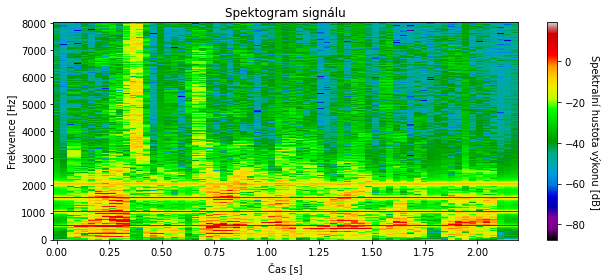

In [27]:
matrix_signal_dft = matrix_signal.copy()
for i in range(len(matrix_signal.transpose())):
    matrix_signal_dft.transpose()[i] = np.abs(np.fft.fft(matrix_signal.transpose()[i]))

matrix_signal_dft_p = 10 * np.log10(matrix_signal_dft ** 2)

plt.figure(figsize=(9, 4))
time = np.linspace(0, 2.176, 67)
fr = np.linspace(0, samplerate, 1024)
cmap = "nipy_spectral"
plt.pcolormesh(time, fr[:fr.size // 2 + 1], matrix_signal_dft_p[:len(matrix_signal_dft_p) // 2 + 1],cmap=cmap)
plt.gca().set_title('Spektogram signálu')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()
# plt.savefig('../img/spectogram.pdf')
plt.show()

In [28]:
dft_coefficient_freq = DFT_function(matrix_signal.transpose()[2])
dft_coefficient_freq_abs = np.abs(dft_coefficient_freq)

freq = np.linspace(0, samplerate, 1024)
freq_nose = nose_freq(dft_coefficient_freq_abs[:dft_coefficient_freq_abs.size // 2 + 1], freq, 4)

f1 = freq_nose[0]
f2 = freq_nose[1]
f3 = freq_nose[2]
f4 = freq_nose[3]
print(f"frekvence:")
print(f"\t f1 = {f1}[Hz]")
print(f"\t f2 = {f2}[Hz]")
print(f"\t f3 = {f3}[Hz]")
print(f"\t f4 = {f4}[Hz]")

frekvence:
	 f1 = 516.1290322580645[Hz]
	 f2 = 1032.258064516129[Hz]
	 f3 = 1548.3870967741937[Hz]
	 f4 = 2064.516129032258[Hz]


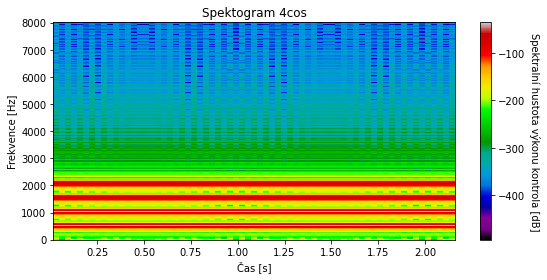

In [29]:
time = np.arange(signal.size) / samplerate
cos_1 = np.cos(2 * np.pi * f1 * time)
cos_2 = np.cos(2 * np.pi * f2 * time)
cos_3 = np.cos(2 * np.pi * f3 * time)
cos_4 = np.cos(2 * np.pi * f4 * time)

cos_all = cos_1 + cos_2 + cos_3 + cos_4

# # print(a)
time = np.arange(data.size) / samplerate
# plt.figure(figsize=(9, 5))
# plt.plot(time[:250], cos_all[:250])
# plt.gca().set_xlabel('$t[s]$')
# plt.gca().set_title('Zvukový signál : "4cos"')
# plt.tight_layout()
# plt.show()

# cosinusovka
wavfile.write("../audio/4cos.wav", samplerate, (cos_all * np.iinfo(np.int16).max).astype(np.int16))
IPython.display.display(IPython.display.Audio(cos_all, rate=16000))

j, k, l = spectrogram(np.array(cos_all), samplerate, nperseg=1024, noverlap=512)
l = 10 * np.log(l)
plt.figure(figsize=(9, 4))
cmap = "nipy_spectral"
plt.pcolormesh(k, j, l,cmap=cmap)
plt.gca().set_title('Spektogram 4cos')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu kontrola [dB]', rotation=270, labelpad=15)
# plt.savefig('../img/spectogram_4cos.pdf')
plt.show()

In [30]:
# fi_1, fs_1 = buttord(wp=[491, 541], ws=[501, 531], gpass=3, gstop=40, fs=16000)
fi_1, fs_1 = buttord([(516-80)/8000, (516+80)/8000],[(516-30)/8000, (516+30)/8000], 3, 40,False)
fi_2, fs_2 = buttord([(1032-80)/8000, (1032+80)/8000], [(1032-30)/8000, (1032+30)/8000], 3, 40,False)
fi_3, fs_3 = buttord([(1548-80)/8000, (1548+80)/8000], [(1548-30)/8000, (1548+30)/8000], 3, 40,False)
fi_4, fs_4 = buttord([(2064-80)/8000, (2064+80)/8000], [(2064-30)/8000, (2064+30)/8000], 3, 40,False)

b_1, a_1 = butter(fi_1,fs_1,output="ba",   btype="bandstop")
b_2, a_2 = butter(fi_2, fs_2, output="ba",   btype="bandstop")
b_3, a_3 = butter(fi_3, fs_3, output="ba",  btype="bandstop")
b_4, a_4 = butter(fi_4, fs_4, output="ba",   btype="bandstop")

print(f'Filter №1: \n  A: {a_1} \n\n  B: {b_1}\n')
print(f'Filter №2: \n  A: {a_2} \n\n  B: {b_2}\n')
print(f'Filter №3: \n  A: {a_2} \n\n  B: {b_3}\n')
print(f'Filter №4: \n  A: {a_2} \n\n  B: {b_4}\n')

Filter №1: 
  A: [   1.           -9.6083864    41.74022142 -107.95165392  184.0638359
 -216.18979593  177.14147417  -99.98460139   37.20583981   -8.24252323
    0.82558966] 

  B: [   0.90861965   -8.90092338   39.42081072 -103.93676277  180.65905012
 -216.30158857  180.65905012 -103.93676277   39.42081072   -8.90092338
    0.90861965]

Filter №2: 
  A: [   1.           -9.00936624   37.27339876  -93.14206008  155.57396443
 -181.41573738  149.55458564  -86.07393037   33.11220999   -7.6939183
    0.82095424] 

  B: [   0.90606525   -8.32732283   35.14370894  -89.58062959  152.61778234
 -181.51910752  152.61778234  -89.58062959   35.14370894   -8.32732283
    0.90606525]

Filter №3: 
  A: [   1.           -9.00936624   37.27339876  -93.14206008  155.57396443
 -181.41573738  149.55458564  -86.07393037   33.11220999   -7.6939183
    0.82095424] 

  B: [   0.90507684   -7.42987507   28.92244795  -69.77513467  115.12406919
 -135.48783293  115.12406919  -69.77513467   28.92244795   -7.429875

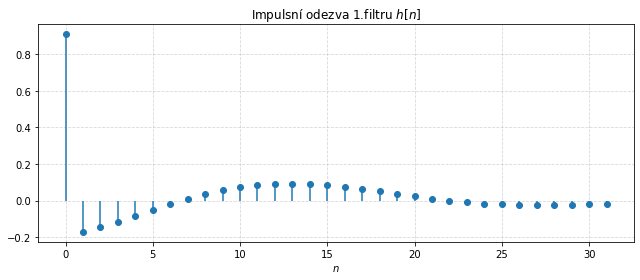

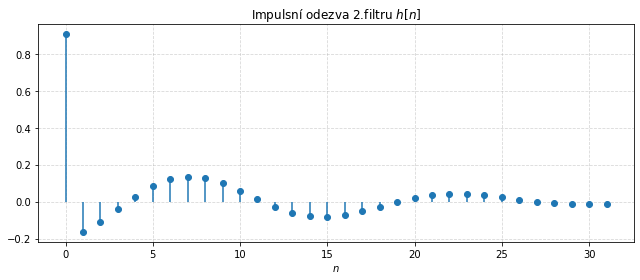

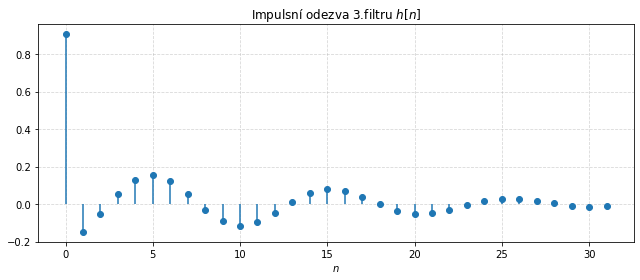

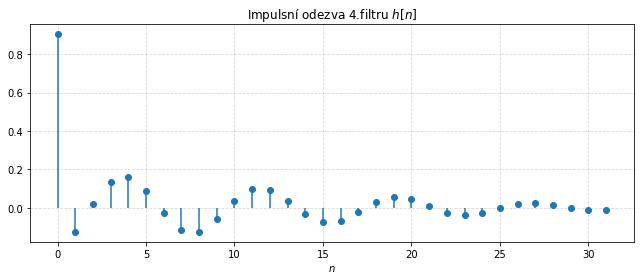

In [31]:
from matplotlib.pyplot import stem

#Impulsna odezva
imp = [1, *np.zeros(32 -1)]


y = scipy.signal.lfilter(b_1,a_1,imp)
plt.figure(figsize=(9,4))
plt.stem(np.arange(32), y, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva 1.filtru $h[n]$')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
# plt.savefig('../img/imp_odezva_1.pdf')
plt.show()



y = scipy.signal.lfilter(b_2,a_2,imp)
plt.figure(figsize=(9,4))
plt.stem(np.arange(32), y, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva 2.filtru $h[n]$')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
# plt.savefig('../img/imp_odezva_2.pdf')
plt.show()



y = scipy.signal.lfilter(b_3,a_3,imp)
plt.figure(figsize=(9,4))
plt.stem(np.arange(32), y, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva 3.filtru $h[n]$')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
# plt.savefig('../img/imp_odezva_3.pdf')
plt.show()



y = scipy.signal.lfilter(b_4,a_4,imp)
plt.figure(figsize=(9,4))
plt.stem(np.arange(32), y, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva 4.filtru $h[n]$')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
# plt.savefig('../img/imp_odezva_4.pdf')
plt.show()

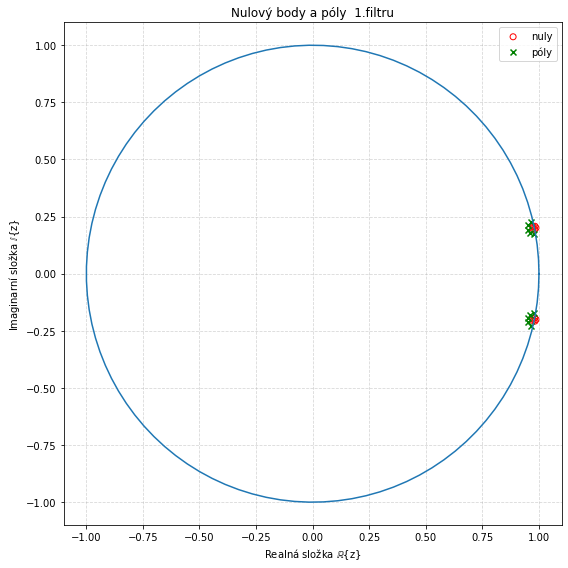

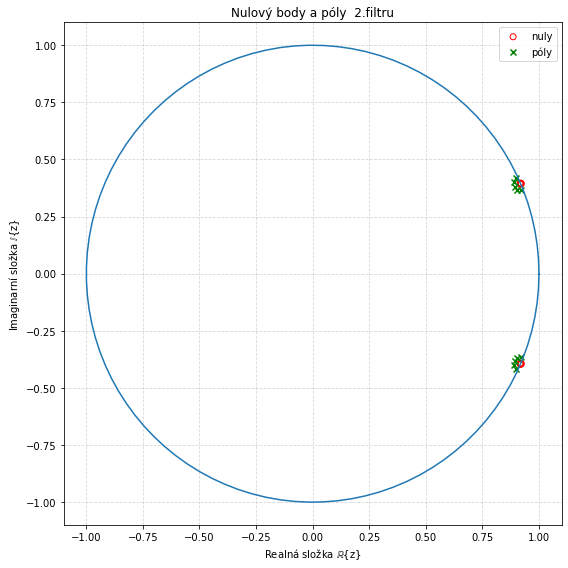

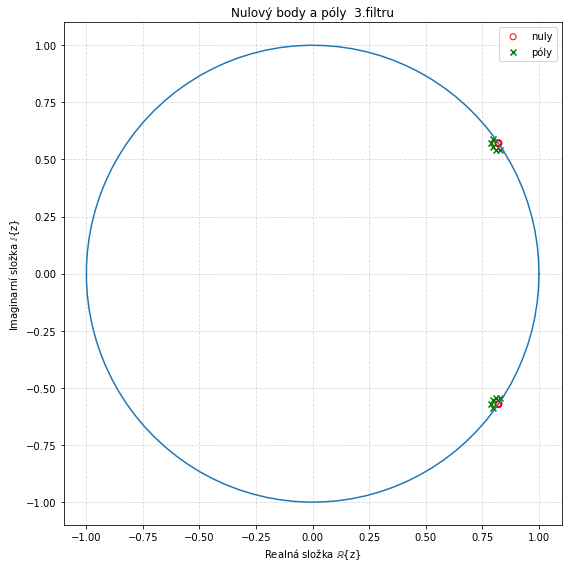

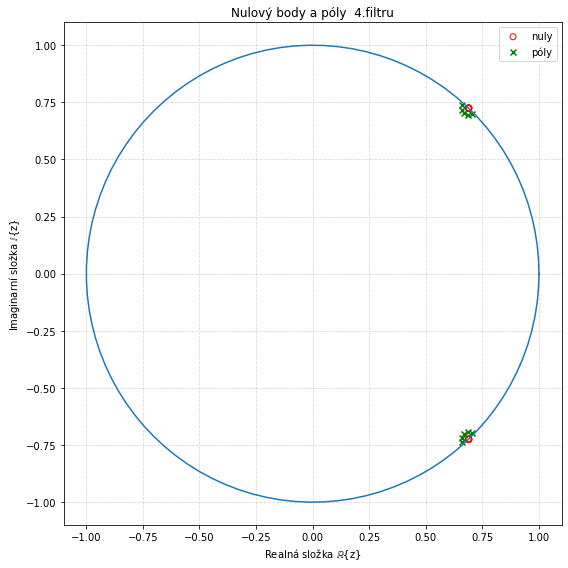

In [32]:
z, p, k = scipy.signal.tf2zpk(b_1, a_1)
plt.figure(figsize=(8,8))
# jednotkova kruznice
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))

# nuly, poly
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')
plt.gca().set_title('Nulový body a póly  1.filtru')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')

plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper right')

plt.tight_layout()
# plt.savefig('../img/np_1.pdf')
plt.show()

z, p, k = scipy.signal.tf2zpk(b_2, a_2)
plt.figure(figsize=(8,8))

# jednotkova kruznice
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))

# nuly, poly
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')
plt.gca().set_title('Nulový body a póly  2.filtru')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')

plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper right')

plt.tight_layout()
# plt.savefig('../img/np_2.pdf')
plt.show()


z, p, k = scipy.signal.tf2zpk(b_3, a_3)
plt.figure(figsize=(8,8))

# jednotkova kruznice
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))

# nuly, poly
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')
plt.gca().set_title('Nulový body a póly  3.filtru')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')

plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper right')

plt.tight_layout()
# plt.savefig('../img/np_3.pdf')
plt.show()

z, p, k = scipy.signal.tf2zpk(b_4, a_4)
plt.figure(figsize=(8,8))

# jednotkova kruznice
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))

# nuly, poly
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')
plt.gca().set_title('Nulový body a póly  4.filtru')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')

plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper right')

plt.tight_layout()
# plt.savefig('../img/np_4.pdf')
plt.show()


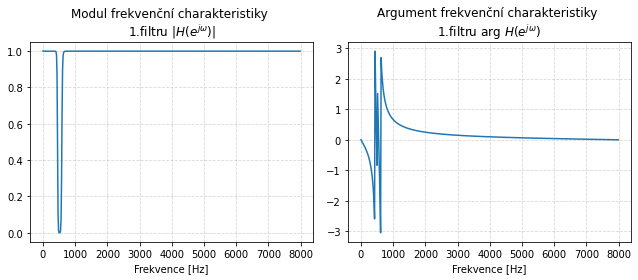

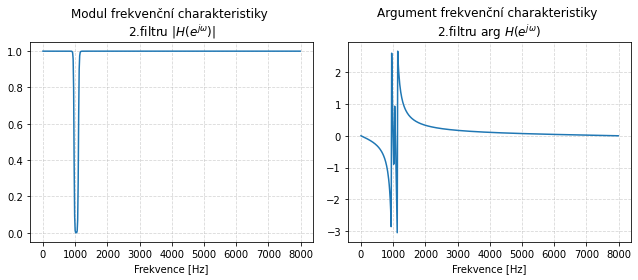

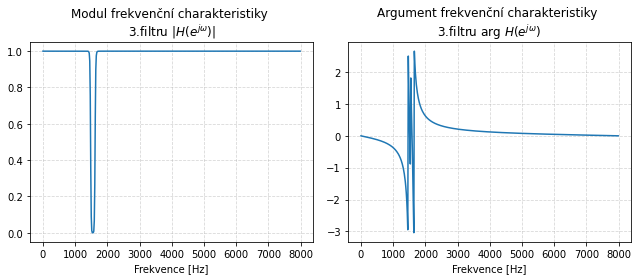

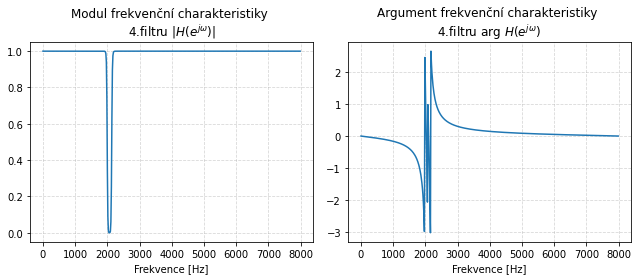

In [33]:
w, H =  scipy.signal.freqz(b_1, a_1)


###
_, ax = plt.subplots(1,2)
_.set_figheight(4)
_.set_figwidth(9)
ax[0].plot(w / 2 / np.pi * 16000, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky \n1.filtru $|H(e^{j\omega})|$')

ax[1].plot(w / 2 / np.pi * 16000, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky \n1.filtru $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
# plt.savefig('../img/fch_1.pdf')
plt.show()


###
w, H =  scipy.signal.freqz(b_2, a_2)

_, ax = plt.subplots(1,2)
_.set_figheight(4)
_.set_figwidth(9)
ax[0].plot(w / 2 / np.pi * 16000, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky \n2.filtru $|H(e^{j\omega})|$')

ax[1].plot(w / 2 / np.pi * 16000, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky \n2.filtru $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
# plt.savefig('../img/fch_2.pdf')
plt.show()
###
w, H =  scipy.signal.freqz(b_3, a_3)

_, ax = plt.subplots(1,2)
_.set_figheight(4)
_.set_figwidth(9)
ax[0].plot(w / 2 / np.pi * 16000, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky \n3.filtru $|H(e^{j\omega})|$')

ax[1].plot(w / 2 / np.pi * 16000, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky \n3.filtru $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
# plt.savefig('../img/fch_3.pdf')
plt.show()
###
w, H =  scipy.signal.freqz(b_4, a_4)
_, ax = plt.subplots(1,2)
_.set_figheight(4)
_.set_figwidth(9)
ax[0].plot(w / 2 / np.pi * 16000, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky \n4.filtru $|H(e^{j\omega})|$')

ax[1].plot(w / 2 / np.pi * 16000, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky \n4.filtru $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
# plt.savefig('../img/fch_4.pdf')
plt.show()


In [34]:
filtered_signal = scipy.signal.lfilter(b_1, a_1, signal)
filtered_signal = scipy.signal.lfilter(b_2, a_2, filtered_signal)
filtered_signal = scipy.signal.lfilter(b_3, a_3, filtered_signal)
filtered_signal = scipy.signal.lfilter(b_4, a_4, filtered_signal)
# filtered_signal = filtered_signal*(2**15)
# filtered_signal = filtered_signal.astype(np.int16)
wavfile.write("../audio/clean_bandstop.wav", samplerate, (filtered_signal * np.iinfo(np.int16).max).astype(np.int16))
IPython.display.display(IPython.display.Audio(filtered_signal, rate=16000))

In [35]:
# #Prvni spusob
# nul_1 = np.e ** (1j * 2 * np.pi * f1 / samplerate)
# nul_2 = np.e ** (1j * 2 * np.pi * f2 / samplerate)
# nul_3 = np.e ** (1j * 2 * np.pi * f3 / samplerate)
# nul_4 = np.e ** (1j * 2 * np.pi * f4 / samplerate)
# nul_5 = np.conj(nul_1)
# nul_6 = np.conj(nul_2)
# nul_7 = np.conj(nul_3)
# nul_8 = np.conj(nul_4)
#
# nuly = []
# nuly.append(nul_1)
# nuly.append(nul_2)
# nuly.append(nul_3)
# nuly.append(nul_4)
# nuly.append(nul_5)
# nuly.append(nul_6)
# nuly.append(nul_7)
# nuly.append(nul_8)
#
# poly = np.poly(nuly)